In [16]:
import xarray as xr
from netCDF4 import Dataset
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from scipy.signal.windows import lanczos
from scipy.stats import spearmanr, ks_2samp, mannwhitneyu
from TC_funcs import *

In [17]:
df_298 = pd.read_csv("./data_files/TC_outer_inner_evolution_298K.csv")

precip_mean_inner_298 = df_298.precip_inner_v*4. #convert from mm/15 minute to mm/hr
precip_mean_outer_298 = df_298.precip_outer_v*4.
precip_max_inner_298 = df_298.precip_max_inner_v*4.
precip_max_outer_298 = df_298.precip_max_outer_v*4.
precip_sum_inner_298 = df_298.precip_sum_inner_v*4. #summed precipitation in the inner core for each 15-minute timestep in mm/hr
precip_sum_outer_298 = df_298.precip_sum_outer_v*4.
time_298 = df_298.hours_after_init
vmax_2D_298 = df_298.vmax_2D
pw_mean_inner_298 = df_298.pw_inner
pw_mean_outer_298 = df_298.pw_outer
w_max_inner_298 = df_298.w_max_inner
w_max_outer_298 = df_298.w_max_outer
w_mean_inner_298 = df_298.w_mean_upward_inner
w_mean_outer_298 = df_298.w_mean_upward_outer
ml_inner_298 = df_298.melt_level_inner
ml_outer_298 = df_298.melt_level_outer
cbh_298 = df_298.cloud_base_height
r_inner_298 = df_298.rinner_v
r_outer_298 = df_298.router_v
etop_inner_298 = df_298.echo_top_inner
etop_outer_298 = df_298.echo_top_outer
lcl_298 = df_298.lcl_pdiff
PE_inner_298 = df_298.PE_max_inner
PE_outer_298 = df_298.PE_max_outer
PE_mean_inner_298 = df_298.PE_mean_inner
PE_mean_outer_298 = df_298.PE_mean_outer


inner_count_298 = df_298.inner_count
outer_count_298 = df_298.outer_count
strat_inner_298 = df_298.strat_count_inner
strat_outer_298 = df_298.strat_count_outer
conv_inner_298 = df_298.conv_count_inner
conv_outer_298 = df_298.conv_count_outer
precip_strat_inner_298 = df_298.strat_precip_inner*4.
precip_strat_outer_298 = df_298.strat_precip_outer*4.
precip_conv_inner_298 = df_298.conv_precip_inner*4.
precip_conv_outer_298 = df_298.conv_precip_outer*4.

In [18]:
df_300 = pd.read_csv("./data_files/TC_outer_inner_evolution_300K.csv")

precip_mean_inner_300 = df_300.precip_inner_v*4.
precip_mean_outer_300 = df_300.precip_outer_v*4.
precip_max_inner_300 = df_300.precip_max_inner_v*4.
precip_max_outer_300 = df_300.precip_max_outer_v*4.
precip_sum_inner_300 = df_300.precip_sum_inner_v*4. #total precipitation in the inner core for each 15-minute timestep, in mm/hr
precip_sum_outer_300 = df_300.precip_sum_outer_v*4.
time_300 = df_300.hours_after_init
vmax_2D_300 = df_300.vmax_2D
pw_mean_inner_300 = df_300.pw_inner
pw_mean_outer_300 = df_300.pw_outer
w_max_inner_300 = df_300.w_max_inner
w_max_outer_300 = df_300.w_max_outer
w_mean_inner_300 = df_300.w_mean_upward_inner
w_mean_outer_300 = df_300.w_mean_upward_outer
ml_inner_300 = df_300.melt_level_inner
ml_outer_300 = df_300.melt_level_outer
cbh_300 = df_300.cloud_base_height
r_inner_300 = df_300.rinner_v
r_outer_300 = df_300.router_v
etop_inner_300 = df_300.echo_top_inner
etop_outer_300 = df_300.echo_top_outer
lcl_300 = df_300.lcl_pdiff
PE_inner_300 = df_300.PE_max_inner
PE_outer_300 = df_300.PE_max_outer
PE_mean_inner_300 = df_300.PE_mean_inner
PE_mean_outer_300 = df_300.PE_mean_outer

inner_count_300 = df_300.inner_count
outer_count_300 = df_300.outer_count
strat_inner_300 = df_300.strat_count_inner
strat_outer_300 = df_300.strat_count_outer
conv_inner_300 = df_300.conv_count_inner
conv_outer_300 = df_300.conv_count_outer
precip_strat_inner_300 = df_300.strat_precip_inner*4.
precip_strat_outer_300 = df_300.strat_precip_outer*4.
precip_conv_inner_300 = df_300.conv_precip_inner*4.
precip_conv_outer_300 = df_300.conv_precip_outer*4.

In [19]:
df_302 = pd.read_csv("./data_files/TC_outer_inner_evolution_302K.csv")

precip_mean_inner_302 = df_302.precip_inner_v*4.
precip_mean_outer_302 = df_302.precip_outer_v*4.
precip_max_inner_302 = df_302.precip_max_inner_v*4.
precip_max_outer_302 = df_302.precip_max_outer_v*4.
precip_sum_inner_302 = df_302.precip_sum_inner_v*4. #total precipitation in the inner core for each 15-minute timestep, in mm/hr
precip_sum_outer_302 = df_302.precip_sum_outer_v*4.
time_302 = df_302.hours_after_init
vmax_2D_302 = df_302.vmax_2D
pw_mean_inner_302 = df_302.pw_inner
pw_mean_outer_302 = df_302.pw_outer
w_max_inner_302 = df_302.w_max_inner
w_max_outer_302 = df_302.w_max_outer
w_mean_inner_302 = df_302.w_mean_upward_inner
w_mean_outer_302 = df_302.w_mean_upward_outer
ml_inner_302 = df_302.melt_level_inner
ml_outer_302 = df_302.melt_level_outer
cbh_302 = df_302.cloud_base_height
r_inner_302 = df_302.rinner_v
r_outer_302 = df_302.router_v
etop_inner_302 = df_302.echo_top_inner
etop_outer_302 = df_302.echo_top_outer
lcl_302 = df_302.lcl_pdiff
PE_inner_302 = df_302.PE_max_inner
PE_outer_302 = df_302.PE_max_outer
PE_mean_inner_302 = df_302.PE_mean_inner
PE_mean_outer_302 = df_302.PE_mean_outer

inner_count_302 = df_302.inner_count
outer_count_302 = df_302.outer_count
strat_inner_302 = df_302.strat_count_inner
strat_outer_302 = df_302.strat_count_outer
conv_inner_302 = df_302.conv_count_inner
conv_outer_302 = df_302.conv_count_outer
precip_strat_inner_302 = df_302.strat_precip_inner*4.
precip_strat_outer_302 = df_302.strat_precip_outer*4.
precip_conv_inner_302 = df_302.conv_precip_inner*4.
precip_conv_outer_302 = df_302.conv_precip_outer*4.

In [20]:
df_304 = pd.read_csv("./data_files/TC_outer_inner_evolution_304K.csv")

precip_mean_inner_304 = df_304.precip_inner_v*4.
precip_mean_outer_304 = df_304.precip_outer_v*4.
precip_max_inner_304 = df_304.precip_max_inner_v*4.
precip_max_outer_304 = df_304.precip_max_outer_v*4.
precip_sum_inner_304 = df_304.precip_sum_inner_v*4. #total precipitation in the inner core for each 15-minute timestep, in mm/hr
precip_sum_outer_304 = df_304.precip_sum_outer_v*4.
time_304 = df_304.hours_after_init
vmax_2D_304 = df_304.vmax_2D
pw_mean_inner_304 = df_304.pw_inner
pw_mean_outer_304 = df_304.pw_outer
w_max_inner_304 = df_304.w_max_inner
w_max_outer_304 = df_304.w_max_outer
w_mean_inner_304 = df_304.w_mean_upward_inner
w_mean_outer_304 = df_304.w_mean_upward_outer
ml_inner_304 = df_304.melt_level_inner
ml_outer_304 = df_304.melt_level_outer
cbh_304 = df_304.cloud_base_height
r_inner_304 = df_304.rinner_v
r_outer_304 = df_304.router_v
etop_inner_304 = df_304.echo_top_inner
etop_outer_304 = df_304.echo_top_outer
lcl_304 = df_304.lcl_pdiff
PE_inner_304 = df_304.PE_max_inner
PE_outer_304 = df_304.PE_max_outer
PE_mean_inner_304 = df_304.PE_mean_inner
PE_mean_outer_304 = df_304.PE_mean_outer

inner_count_304 = df_304.inner_count
outer_count_304 = df_304.outer_count
strat_inner_304 = df_304.strat_count_inner
strat_outer_304 = df_304.strat_count_outer
conv_inner_304 = df_304.conv_count_inner
conv_outer_304 = df_304.conv_count_outer
precip_strat_inner_304 = df_304.strat_precip_inner*4.
precip_strat_outer_304 = df_304.strat_precip_outer*4.
precip_conv_inner_304 = df_304.conv_precip_inner*4.
precip_conv_outer_304 = df_304.conv_precip_outer*4.

Text(0.5, 1.0, 'Outer Rainband Mean Precip.')

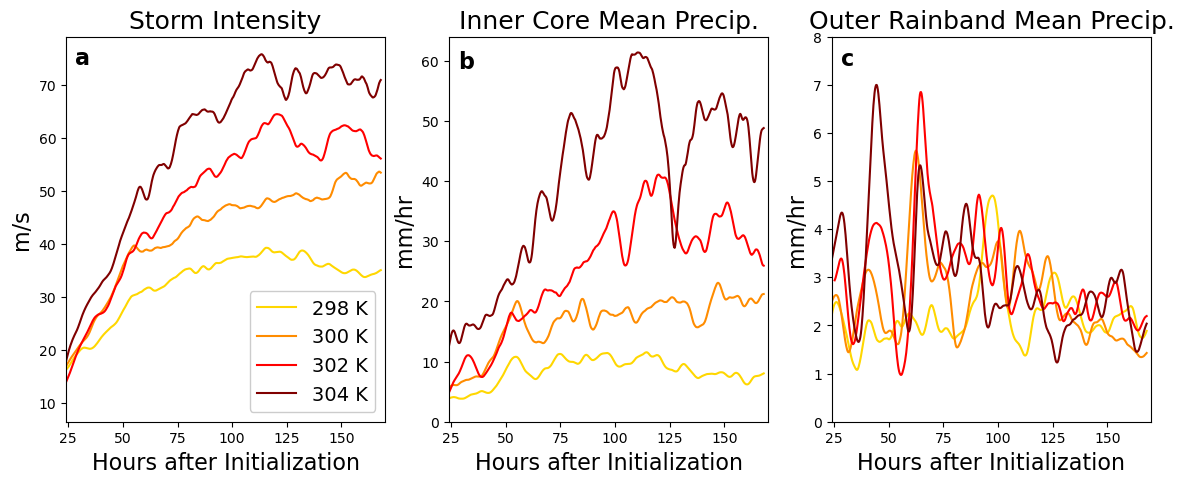

In [21]:
fig3, ax = plt.subplots(1,3,figsize=(14,5))

vmax_298_smoothed = vmax_2D_298.rolling(window=24, win_type = "lanczos").mean()
vmax_300_smoothed = vmax_2D_300.rolling(window=24, win_type = "lanczos").mean()
vmax_302_smoothed = vmax_2D_302.rolling(window=24, win_type = "lanczos").mean()
vmax_304_smoothed = vmax_2D_304.rolling(window=24, win_type = "lanczos").mean()

ax[0].plot(time_298,vmax_298_smoothed, c="gold",label="298 K")
ax[0].plot(time_300,vmax_300_smoothed, c="darkorange",label="300 K")
ax[0].plot(time_302,vmax_302_smoothed, 'r',label="302 K")
ax[0].plot(time_304,vmax_304_smoothed, c="maroon",label="304 K")

ax[0].set_xlim(24,170)

legend1 = ax[0].legend(fontsize=14)
legend1.get_frame().set_alpha(None)
legend1.get_frame().set_facecolor((0, 0, 0, 0))
ax[0].set_ylabel("m/s",fontsize=16)
ax[0].set_xlabel("Hours after Initialization",fontsize=16)

ax[0].text(28,74,"a",fontsize=16,weight="bold")
ax[0].set_title("Storm Intensity",fontsize=18)

precip_mean_outer_smoothed_298 = precip_mean_outer_298.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_300 = precip_mean_outer_300.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_302 = precip_mean_outer_302.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_304 = precip_mean_outer_304.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_298 = precip_mean_inner_298.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_300 = precip_mean_inner_300.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_302 = precip_mean_inner_302.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_304 = precip_mean_inner_304.rolling(window=24, win_type = "lanczos").mean()


ax[1].plot(time_298,precip_mean_inner_smoothed_298, c="gold")
ax[1].plot(time_300,precip_mean_inner_smoothed_300,  c="darkorange")
ax[1].plot(time_302,precip_mean_inner_smoothed_302, 'r')
ax[1].plot(time_304,precip_mean_inner_smoothed_304, c="maroon")

ax[2].plot(time_298,precip_mean_outer_smoothed_298, c="gold")
ax[2].plot(time_300,precip_mean_outer_smoothed_300, c="darkorange")
ax[2].plot(time_302,precip_mean_outer_smoothed_302, 'r')
ax[2].plot(time_304,precip_mean_outer_smoothed_304, c="maroon")

ax[1].set_xlim(24,170)
ax[1].set_ylim(0,64)

ax[2].set_xlim(24,170)
ax[2].set_ylim(0,8)

ax[1].set_ylabel("mm/hr",fontsize=16)
ax[1].set_xlabel("Hours after Initialization",fontsize=16)

ax[2].set_ylabel("mm/hr",fontsize=16)
ax[2].set_xlabel("Hours after Initialization",fontsize=16)

ax[1].text(28,58.7,"b",fontsize=16,weight="bold")
ax[1].set_title("Inner Core Mean Precip.",fontsize=18)

ax[2].text(28,7.4,"c",fontsize=16,weight="bold")
ax[2].set_title("Outer Rainband Mean Precip.",fontsize=18)

In [22]:
print ("Lifetime Maximum Intensities")
print (np.nanmax(vmax_2D_298[95:]), np.nanmax(vmax_2D_300[95:]), np.nanmax(vmax_2D_302[95:]), np.nanmax(vmax_2D_304[95:]))

print ("Time and Spatial Mean Inner Core and Outer Rainband Precipitation")
print (np.nanmean(precip_mean_inner_298[95:]),np.nanmean(precip_mean_outer_298[95:]))
print (np.nanmean(precip_mean_inner_300[95:]),np.nanmean(precip_mean_outer_300[95:]))
print (np.nanmean(precip_mean_inner_302[95:]),np.nanmean(precip_mean_outer_302[95:]))
print (np.nanmean(precip_mean_inner_304[95:]),np.nanmean(precip_mean_outer_304[95:]))

print ("Testing for statistical significance of mean inner core precipitation distributions")
print (mannwhitneyu(precip_mean_inner_300[95:],precip_mean_inner_298[95:],alternative="greater"))
print (mannwhitneyu(precip_mean_inner_302[95:],precip_mean_inner_300[95:],alternative="greater"))
print (mannwhitneyu(precip_mean_inner_304[95:],precip_mean_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of mean outer rainband precipitation distributions")
print (mannwhitneyu(precip_mean_outer_300[95:],precip_mean_outer_298[95:],alternative="greater"))
print (mannwhitneyu(precip_mean_outer_302[95:],precip_mean_outer_300[95:],alternative="greater"))
print (mannwhitneyu(precip_mean_outer_304[95:],precip_mean_outer_302[95:],alternative="greater"))

print ("Calculating % per K increase in mean inner core and outer rainband precipitation")
pc_298_300_mean_inner = (((np.nanmean(precip_mean_inner_300[95:])-np.nanmean(precip_mean_inner_298[95:]))/np.nanmean(precip_mean_inner_298[95:]))*100.)/2.
pc_300_302_mean_inner = (((np.nanmean(precip_mean_inner_302[95:])-np.nanmean(precip_mean_inner_300[95:]))/np.nanmean(precip_mean_inner_300[95:]))*100.)/2.
pc_302_304_mean_inner = (((np.nanmean(precip_mean_inner_304[95:])-np.nanmean(precip_mean_inner_302[95:]))/np.nanmean(precip_mean_inner_302[95:]))*100.)/2.
print (np.nanmean([pc_298_300_mean_inner, pc_300_302_mean_inner, pc_302_304_mean_inner]))

pc_298_300_mean_outer = (((np.nanmean(precip_mean_outer_300[95:])-np.nanmean(precip_mean_outer_298[95:]))/np.nanmean(precip_mean_outer_298[95:]))*100.)/2.
pc_300_302_mean_outer = (((np.nanmean(precip_mean_outer_302[95:])-np.nanmean(precip_mean_outer_300[95:]))/np.nanmean(precip_mean_outer_300[95:]))*100.)/2.
pc_302_304_mean_outer = (((np.nanmean(precip_mean_outer_304[95:])-np.nanmean(precip_mean_outer_302[95:]))/np.nanmean(precip_mean_outer_302[95:]))*100.)/2.
print (np.nanmean([pc_298_300_mean_outer, pc_300_302_mean_outer, pc_302_304_mean_outer]))

print ("Testing for statistical significance of mean inner core precipitable water distributions")
print (mannwhitneyu(pw_mean_inner_300[95:],pw_mean_inner_298[95:],alternative="greater"))
print (mannwhitneyu(pw_mean_inner_302[95:],pw_mean_inner_300[95:],alternative="greater"))
print (mannwhitneyu(pw_mean_inner_304[95:],pw_mean_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of mean outer rainband precipitable water distributions")
print (mannwhitneyu(pw_mean_outer_300[95:],pw_mean_outer_298[95:],alternative="greater"))
print (mannwhitneyu(pw_mean_outer_302[95:],pw_mean_outer_300[95:],alternative="greater"))
print (mannwhitneyu(pw_mean_outer_304[95:],pw_mean_outer_302[95:],alternative="greater"))

print ("Calculating % per K increase in mean inner core and outer rainband precipitable water")
pw_298_300_mean_inner = (((np.nanmean(pw_mean_inner_300[95:])-np.nanmean(pw_mean_inner_298[95:]))/np.nanmean(pw_mean_inner_298[95:]))*100.)/2.
pw_300_302_mean_inner = (((np.nanmean(pw_mean_inner_302[95:])-np.nanmean(pw_mean_inner_300[95:]))/np.nanmean(pw_mean_inner_300[95:]))*100.)/2.
pw_302_304_mean_inner = (((np.nanmean(pw_mean_inner_304[95:])-np.nanmean(pw_mean_inner_302[95:]))/np.nanmean(pw_mean_inner_302[95:]))*100.)/2.
print (np.nanmean([pw_298_300_mean_inner, pw_300_302_mean_inner, pw_302_304_mean_inner]))

pw_298_300_mean_outer = (((np.nanmean(pw_mean_outer_300[95:])-np.nanmean(pw_mean_outer_298[95:]))/np.nanmean(pw_mean_outer_298[95:]))*100.)/2.
pw_300_302_mean_outer = (((np.nanmean(pw_mean_outer_302[95:])-np.nanmean(pw_mean_outer_300[95:]))/np.nanmean(pw_mean_outer_300[95:]))*100.)/2.
pw_302_304_mean_outer = (((np.nanmean(pw_mean_outer_304[95:])-np.nanmean(pw_mean_outer_302[95:]))/np.nanmean(pw_mean_outer_302[95:]))*100.)/2.
print (np.nanmean([pw_298_300_mean_outer, pw_300_302_mean_outer, pw_302_304_mean_outer]))

Lifetime Maximum Intensities
41.18494835976632 57.79894668034145 69.13214442017791 83.0827360534668
Time and Spatial Mean Inner Core and Outer Rainband Precipitation
8.531390657123051 2.2099779979896015
16.851952526169843 2.56565345864818
25.719166264124787 2.982721114065858
41.20488613448874 3.00068404915078
Testing for statistical significance of mean inner core precipitation distributions
MannwhitneyuResult(statistic=304812.0, pvalue=3.248285841997866e-132)
MannwhitneyuResult(statistic=259645.0, pvalue=3.518057760777823e-61)
MannwhitneyuResult(statistic=259296.0, pvalue=9.72373210847732e-61)
Testing for statistical significance of mean outer rainband precipitation distributions
MannwhitneyuResult(statistic=198197.0, pvalue=1.0377388315278888e-08)
MannwhitneyuResult(statistic=205341.0, pvalue=3.2644047503895173e-12)
MannwhitneyuResult(statistic=163000.0, pvalue=0.7297663818345481)
Calculating % per K increase in mean inner core and outer rainband precipitation
35.059653359069635
5.49

In [23]:
#calculate statistics for accumulated precipitation over the TCs' lifetimes (starting 24 hours after model initialization)
nhours = len(precip_sum_inner_298[95:])/4. #number of hours going into the calculations

accum_precip_inner_298 = np.nanmean(precip_sum_inner_298[95:])*nhours #units = mm
accum_precip_outer_298 = np.nanmean(precip_sum_outer_298[95:])*nhours

accum_precip_inner_300 = np.nanmean(precip_sum_inner_300[95:])*nhours
accum_precip_outer_300 = np.nanmean(precip_sum_outer_300[95:])*nhours

accum_precip_inner_302 = np.nanmean(precip_sum_inner_302[95:])*nhours
accum_precip_outer_302 = np.nanmean(precip_sum_outer_302[95:])*nhours

accum_precip_inner_304 = np.nanmean(precip_sum_inner_304[95:])*nhours
accum_precip_outer_304 = np.nanmean(precip_sum_outer_304[95:])*nhours

print (accum_precip_inner_298, accum_precip_outer_298)
print (accum_precip_inner_300, accum_precip_outer_300)
print (accum_precip_inner_302, accum_precip_outer_302)
print (accum_precip_inner_304, accum_precip_outer_304)

print ("Testing for statistical significance of accumulated inner core precipitation distributions")
print (mannwhitneyu(precip_sum_inner_300[95:],precip_sum_inner_298[95:],alternative="greater"))
print (mannwhitneyu(precip_sum_inner_302[95:],precip_sum_inner_300[95:],alternative="greater"))
print (mannwhitneyu(precip_sum_inner_304[95:],precip_sum_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of accumulated outer rainband precipitation distributions")
print (mannwhitneyu(precip_sum_outer_300[95:],precip_sum_outer_298[95:],alternative="greater"))
print (mannwhitneyu(precip_sum_outer_302[95:],precip_sum_outer_300[95:],alternative="greater"))
print (mannwhitneyu(precip_sum_outer_304[95:],precip_sum_outer_302[95:],alternative="greater"))

144.25
11007089.419400001 14935937.199899998
14301328.202 13013416.6472
14743996.3647 15818275.8353
16867525.711999997 17179306.5229
Testing for statistical significance of accumulated inner core precipitation distributions
MannwhitneyuResult(statistic=230378.0, pvalue=7.310462821090522e-30)
MannwhitneyuResult(statistic=178992.0, pvalue=0.013450670567637926)
MannwhitneyuResult(statistic=196249.0, pvalue=7.14553171738983e-08)
Testing for statistical significance of accumulated outer rainband precipitation distributions
MannwhitneyuResult(statistic=143861.0, pvalue=0.999967391122162)
MannwhitneyuResult(statistic=208096.0, pvalue=9.597340527332519e-14)
MannwhitneyuResult(statistic=175954.0, pvalue=0.04684254892052201)


MannwhitneyuResult(statistic=137311.0, pvalue=2.6048907213012935e-07)


Text(160, 15, 'b')

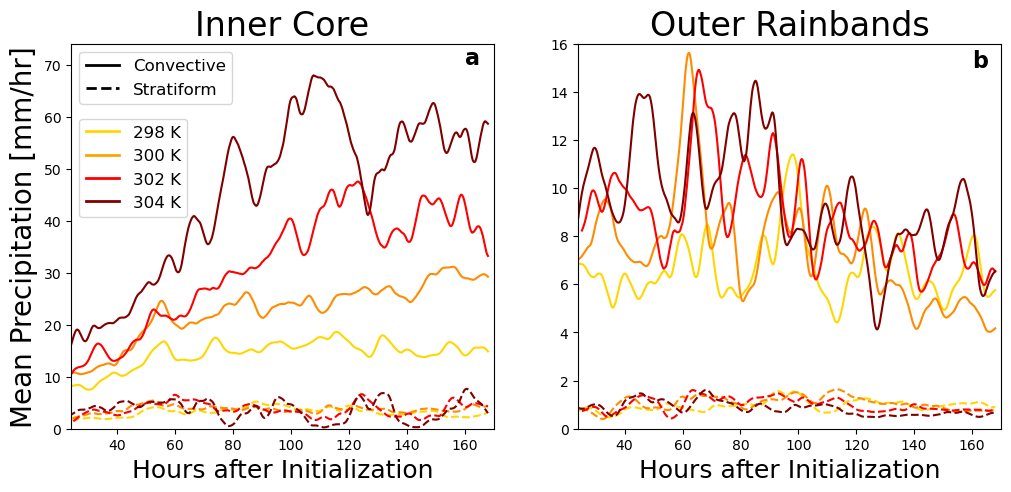

In [24]:
fig5, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(time_298,precip_conv_inner_298.rolling(window=24, win_type = "lanczos").mean(), c="gold",label="Convective")
ax[0].plot(time_300,precip_conv_inner_300.rolling(window=24, win_type = "lanczos").mean(), c="darkorange")
ax[0].plot(time_302,precip_conv_inner_302.rolling(window=24, win_type = "lanczos").mean(), 'r')
ax[0].plot(time_304,precip_conv_inner_304.rolling(window=24, win_type = "lanczos").mean(), c="maroon")
ax[0].plot(time_298,precip_strat_inner_298.rolling(window=24, win_type = "lanczos").mean(), c="gold",linestyle="dashed", label="Stratiform")
ax[0].plot(time_300,precip_strat_inner_300.rolling(window=24, win_type = "lanczos").mean(), c="darkorange",linestyle="dashed")
ax[0].plot(time_302,precip_strat_inner_302.rolling(window=24, win_type = "lanczos").mean(), 'r',linestyle="dashed")
ax[0].plot(time_304,precip_strat_inner_304.rolling(window=24, win_type = "lanczos").mean(), c="maroon",linestyle="dashed")
ax[0].set_ylabel("Mean Precipitation [mm/hr]",fontsize=20)
ax[0].set_title("Inner Core",fontsize=24)

custom_lines = [Line2D([0], [0], color="k", lw=2), Line2D([0], [0], color="k", lw=2, linestyle="dashed"),]
l1 = ax[0].legend(custom_lines, ['Convective', 'Stratiform'], fontsize=12)

custom_lines2 = [Line2D([0], [0], color="gold", lw=2), Line2D([0], [0], color="orange", lw=2), Line2D([0], [0], color="red", lw=2), Line2D([0], [0], color="maroon", lw=2),]
l2 = ax[0].legend(custom_lines2, ['298 K', '300 K', '302 K', '304 K'], fontsize=12, loc=(0.02,0.55))
ax[0].add_artist(l1)

print (mannwhitneyu(precip_strat_outer_298[95:],precip_strat_outer_300[95:]))

ax[1].plot(time_298,precip_conv_outer_298.rolling(window=24, win_type = "lanczos").mean(), c="gold",label="298 K")
ax[1].plot(time_300,precip_conv_outer_300.rolling(window=24, win_type = "lanczos").mean(), c="darkorange",label="300 K")
ax[1].plot(time_302,precip_conv_outer_302.rolling(window=24, win_type = "lanczos").mean(), 'r',label="302 K")
ax[1].plot(time_304,precip_conv_outer_304.rolling(window=24, win_type = "lanczos").mean(), c="maroon",label="304 K")
ax[1].plot(time_298,precip_strat_outer_298.rolling(window=24, win_type = "lanczos").mean(), c="gold",linestyle="dashed")
ax[1].plot(time_300,precip_strat_outer_300.rolling(window=24, win_type = "lanczos").mean(), c="darkorange",linestyle="dashed")
ax[1].plot(time_302,precip_strat_outer_302.rolling(window=24, win_type = "lanczos").mean(), 'r',linestyle="dashed")
ax[1].plot(time_304,precip_strat_outer_304.rolling(window=24, win_type = "lanczos").mean(), c="maroon",linestyle="dashed")
ax[1].set_title("Outer Rainbands",fontsize=24)

ax[0].set_xlim(24,170)
ax[1].set_xlim(24,170)

ax[0].set_ylim(0,74)
ax[1].set_ylim(0,16)

ax[0].set_xlabel("Hours after Initialization",fontsize=18)
ax[1].set_xlabel("Hours after Initialization",fontsize=18)

ax[0].text(160,70,"a",fontsize=16,weight="bold")
ax[1].text(160,15,"b",fontsize=16,weight="bold")

0.4372157034073771 0.6312060813250924 0.7245650913830722 0.8378688749765159
0.09226872626465103 0.07888851381071829 0.08443308844539921 0.08955401999154901
SignificanceResult(statistic=0.9004102126380888, pvalue=5.2804699538155246e-210)
[[1.         0.89739901]
 [0.89739901 1.        ]]
SignificanceResult(statistic=0.7138887276877267, pvalue=4.913296674652321e-91)
[[1.         0.78889267]
 [0.78889267 1.        ]]
SignificanceResult(statistic=0.6912062536651693, pvalue=3.695720057603188e-83)
[[1.         0.76139225]
 [0.76139225 1.        ]]
SignificanceResult(statistic=0.5547154773101596, pvalue=7.229693403165504e-48)
[[1.         0.69908052]
 [0.69908052 1.        ]]


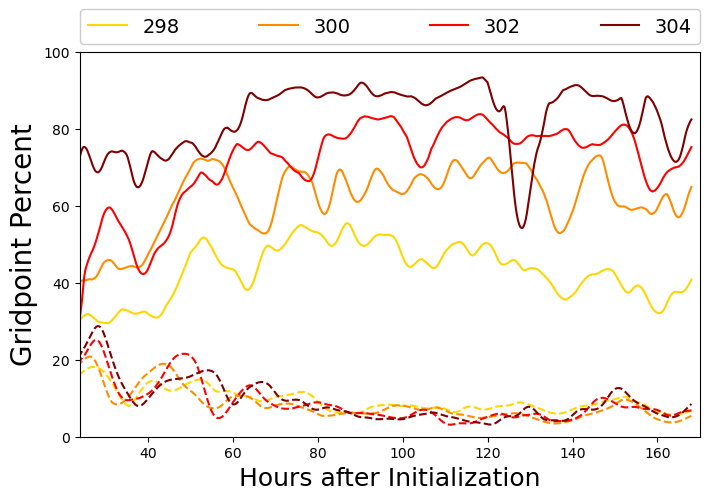

In [25]:
fig6, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(time_298,(conv_inner_298.rolling(window=24, win_type = "lanczos").mean()/inner_count_298.rolling(window=24, win_type = "lanczos").mean())*100., c="gold",label="298")
ax.plot(time_300,(conv_inner_300.rolling(window=24, win_type = "lanczos").mean()/inner_count_300.rolling(window=24, win_type = "lanczos").mean())*100., c="darkorange",label="300")
ax.plot(time_302,(conv_inner_302.rolling(window=24, win_type = "lanczos").mean()/inner_count_302.rolling(window=24, win_type = "lanczos").mean())*100., 'r',label="302")
ax.plot(time_304,(conv_inner_304.rolling(window=24, win_type = "lanczos").mean()/inner_count_304.rolling(window=24, win_type = "lanczos").mean())*100., c="maroon",label="304")
ax.plot(time_298,(conv_outer_298.rolling(window=24, win_type = "lanczos").mean()/outer_count_298.rolling(window=24, win_type = "lanczos").mean())*100., c="gold",linestyle="dashed")
ax.plot(time_300,(conv_outer_300.rolling(window=24, win_type = "lanczos").mean()/outer_count_300.rolling(window=24, win_type = "lanczos").mean())*100., c="darkorange",linestyle="dashed")
ax.plot(time_302,(conv_outer_302.rolling(window=24, win_type = "lanczos").mean()/outer_count_302.rolling(window=24, win_type = "lanczos").mean())*100., 'r',linestyle="dashed")
ax.plot(time_304,(conv_outer_304.rolling(window=24, win_type = "lanczos").mean()/outer_count_304.rolling(window=24, win_type = "lanczos").mean())*100., c="maroon",linestyle="dashed")
ax.set_ylabel("Gridpoint Percent",fontsize=20)
legend = ax.legend(fontsize=14,ncol=4,bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode="expand", borderaxespad=0)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))

ax.set_xlim(24,170)
ax.set_ylim(0,100)

ax.set_xlabel("Hours after Initialization",fontsize=18)

#Mean values of the percent of convection in the IC and OR
print (np.nanmean(conv_inner_298[95:]/inner_count_298[95:]), np.nanmean(conv_inner_300[95:]/inner_count_300[95:]), np.nanmean(conv_inner_302[95:]/inner_count_302[95:]), np.nanmean(conv_inner_304[95:]/inner_count_304[95:]))
print (np.nanmean(conv_outer_298[95:]/outer_count_298[95:]), np.nanmean(conv_outer_300[95:]/outer_count_300[95:]), np.nanmean(conv_outer_302[95:]/outer_count_302[95:]), np.nanmean(conv_outer_304[95:]/outer_count_304[95:]))


#Calculate spearman's rank correlations between % of convection in inner core and mean IC precipitation
print (spearmanr(conv_inner_298[95:]/inner_count_298[95:], precip_mean_inner_298[95:]))
print (np.corrcoef(conv_inner_298[95:]/inner_count_298[95:], precip_mean_inner_298[95:]))

print (spearmanr(conv_inner_300[95:]/inner_count_300[95:], precip_mean_inner_300[95:]))
print (np.corrcoef(conv_inner_300[95:]/inner_count_300[95:], precip_mean_inner_300[95:]))

print (spearmanr(conv_inner_302[95:]/inner_count_302[95:], precip_mean_inner_302[95:]))
print (np.corrcoef(conv_inner_302[95:]/inner_count_302[95:], precip_mean_inner_302[95:]))

print (spearmanr(conv_inner_304[95:]/inner_count_304[95:], precip_mean_inner_304[95:]))
print (np.corrcoef(conv_inner_304[95:]/inner_count_304[95:], precip_mean_inner_304[95:]))

In [26]:
w_max_inner_298 = w_max_inner_298[~np.isnan(w_max_inner_298)]
w_max_inner_300 = w_max_inner_300[~np.isnan(w_max_inner_300)]
w_max_inner_302 = w_max_inner_302[~np.isnan(w_max_inner_302)]
w_max_inner_304 = w_max_inner_304[~np.isnan(w_max_inner_304)]

w_max_outer_298 = w_max_outer_298[~np.isnan(w_max_outer_298)]
w_max_outer_300 = w_max_outer_300[~np.isnan(w_max_outer_300)]
w_max_outer_302 = w_max_outer_302[~np.isnan(w_max_outer_302)]
w_max_outer_304 = w_max_outer_304[~np.isnan(w_max_outer_304)]

print ("Inner core maximum vertical velocities")
print (np.nanmean(w_max_inner_298[95:]), np.nanmean(w_max_inner_300[95:]), np.nanmean(w_max_inner_302[95:]), np.nanmean(w_max_inner_304[95:]))
print ("Outer rainband maximum vertical velocities")
print (np.nanmean(w_max_outer_298[95:]), np.nanmean(w_max_outer_300[95:]), np.nanmean(w_max_outer_302[95:]), np.nanmean(w_max_outer_304[95:]))

print ("Testing for statistical significance of maximum vertical velocity inner core distributions")
print (mannwhitneyu(w_max_inner_300[95:],w_max_inner_298[95:],alternative="greater"))
print (mannwhitneyu(w_max_inner_302[95:],w_max_inner_300[95:],alternative="greater"))
print (mannwhitneyu(w_max_inner_304[95:],w_max_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of maximum vertical velocity OR distributions")
print (mannwhitneyu(w_max_outer_300[95:],w_max_outer_298[95:],alternative="greater"))
print (mannwhitneyu(w_max_outer_302[95:],w_max_outer_300[95:],alternative="greater"))
print (mannwhitneyu(w_max_outer_304[95:],w_max_outer_302[95:],alternative="greater"))


print ("Inner core mean upward vertical velocities")
print (np.nanmean(w_mean_inner_298[95:]), np.nanmean(w_mean_inner_300[95:]), np.nanmean(w_mean_inner_302[95:]), np.nanmean(w_mean_inner_304[95:]))
print ("Outer rainband mean upward vertical velocities")
print (np.nanmean(w_mean_outer_298[95:]), np.nanmean(w_mean_outer_300[95:]), np.nanmean(w_mean_outer_302[95:]), np.nanmean(w_mean_outer_304[95:]))

print ("Testing for statistical significance of maximum vertical velocity inner core distributions")
print (mannwhitneyu(w_mean_inner_300[95:],w_mean_inner_298[95:],alternative="greater"))
print (mannwhitneyu(w_mean_inner_302[95:],w_mean_inner_300[95:],alternative="greater"))
print (mannwhitneyu(w_mean_inner_304[95:],w_mean_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of maximum vertical velocity OR distributions")
print (mannwhitneyu(w_mean_outer_300[95:],w_mean_outer_298[95:],alternative="greater"))
print (mannwhitneyu(w_mean_outer_302[95:],w_mean_outer_300[95:],alternative="greater"))
print (mannwhitneyu(w_mean_outer_304[95:],w_mean_outer_302[95:],alternative="greater"))

Inner core maximum vertical velocities
13.483350635008666 12.244588656499134 14.090865382842289 15.45398249133449
Outer rainband maximum vertical velocities
21.241291526737967 23.403238163120566 24.71061060564663 27.198267429475592
Testing for statistical significance of maximum vertical velocity inner core distributions
MannwhitneyuResult(statistic=129375.0, pvalue=0.9999999999716336)
MannwhitneyuResult(statistic=224939.0, pvalue=2.5868020630329997e-25)
MannwhitneyuResult(statistic=211566.0, pvalue=8.110352990217906e-16)
Testing for statistical significance of maximum vertical velocity OR distributions
MannwhitneyuResult(statistic=204530.0, pvalue=9.289013561531278e-18)
MannwhitneyuResult(statistic=179428.0, pvalue=2.2148380668331926e-06)
MannwhitneyuResult(statistic=179688.0, pvalue=6.479303468143771e-08)
Inner core mean upward vertical velocities
0.5542171639688042 0.8026588686135181 1.0754036104159446 1.5654706762738302
Outer rainband mean upward vertical velocities
0.2227341374523

In [27]:
print ("Inner core mean melting level")
print (np.nanmean(ml_inner_298[95:]), np.nanmean(ml_inner_300[95:]), np.nanmean(ml_inner_302[95:]), np.nanmean(ml_inner_304[95:]))
print ("Outer rainband mean melting level")
print (np.nanmean(ml_outer_298[95:]), np.nanmean(ml_outer_300[95:]), np.nanmean(ml_outer_302[95:]), np.nanmean(ml_outer_304[95:]))

print ("Testing for statistical significance of IC melting level distributions")
print (mannwhitneyu(ml_inner_300[95:],ml_inner_298[95:],alternative="greater"))
print (mannwhitneyu(ml_inner_302[95:],ml_inner_300[95:],alternative="greater"))
print (mannwhitneyu(ml_inner_304[95:],ml_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of OR melting level distributions")
print (mannwhitneyu(ml_outer_300[95:],ml_outer_298[95:],alternative="greater"))
print (mannwhitneyu(ml_outer_302[95:],ml_outer_300[95:],alternative="greater"))
print (mannwhitneyu(ml_outer_304[95:],ml_outer_302[95:],alternative="greater"))

Inner core mean melting level
4.057193966724437 4.613358688041594 5.28950903812825 5.996284298093587
Outer rainband mean melting level
3.681515379029463 4.143682649566724 4.665404507972271 5.268227455979202
Testing for statistical significance of IC melting level distributions
MannwhitneyuResult(statistic=326091.0, pvalue=3.042215445144653e-175)
MannwhitneyuResult(statistic=319424.0, pvalue=4.2054368992940484e-161)
MannwhitneyuResult(statistic=303090.0, pvalue=5.317831395672425e-129)
Testing for statistical significance of OR melting level distributions
MannwhitneyuResult(statistic=332929.0, pvalue=2.2639955118663497e-190)
MannwhitneyuResult(statistic=332929.0, pvalue=2.2639916856598365e-190)
MannwhitneyuResult(statistic=332929.0, pvalue=2.2639916856598365e-190)


In [28]:
print ("Mean Cloud Base Height")
print (np.nanmean(cbh_298[95:]), np.nanmean(cbh_300[95:]), np.nanmean(cbh_302[95:]), np.nanmean(cbh_304[95:]))

print ("Testing for statistical significance of cloud base height distributions")
print (mannwhitneyu(cbh_300[95:],cbh_298[95:],alternative="less"))
print (mannwhitneyu(cbh_302[95:],cbh_300[95:],alternative="less"))
print (mannwhitneyu(cbh_304[95:],cbh_302[95:],alternative="less"))

Mean Cloud Base Height
2.37191446360517 2.2507989584263317 2.098572075470275 1.8349252883441733
Testing for statistical significance of cloud base height distributions
MannwhitneyuResult(statistic=62274.0, pvalue=5.923836188357571e-76)
MannwhitneyuResult(statistic=43319.0, pvalue=3.1604868911708414e-105)
MannwhitneyuResult(statistic=38533.0, pvalue=2.189513943476559e-113)


In [29]:
print ("Inner core mean radius")
print (np.nanmean(r_inner_298[95:]), np.nanmean(r_inner_300[95:]), np.nanmean(r_inner_302[95:]), np.nanmean(r_inner_304[95:]))
print ("Outer rainband mean radius")
print (np.nanmean(r_outer_298[95:]), np.nanmean(r_outer_300[95:]), np.nanmean(r_outer_302[95:]), np.nanmean(r_outer_304[95:]))

print ("Testing for statistical significance of inner core radii distributions")
print (mannwhitneyu(r_inner_300[95:],r_inner_298[95:],alternative="less"))
print (mannwhitneyu(r_inner_302[95:],r_inner_300[95:],alternative="less"))
print (mannwhitneyu(r_inner_304[95:],r_inner_302[95:],alternative="less"))

print ("Testing for statistical significance of OR radii distributions")
print (mannwhitneyu(r_outer_300[95:],r_outer_298[95:],alternative="greater"))
print (mannwhitneyu(r_outer_302[95:],r_outer_300[95:],alternative="greater"))
print (mannwhitneyu(r_outer_304[95:],r_outer_302[95:],alternative="greater"))

Inner core mean radius
91.93827556325823 73.53064991334489 61.87827556325823 52.43134315424611
Outer rainband mean radius
341.4744800693241 353.14422010398613 362.1222790294628 360.4378076256499
Testing for statistical significance of inner core radii distributions
MannwhitneyuResult(statistic=48050.0, pvalue=2.2018149039881304e-102)
MannwhitneyuResult(statistic=64557.0, pvalue=8.158496862249799e-79)
MannwhitneyuResult(statistic=76100.5, pvalue=2.034638699422363e-62)
Testing for statistical significance of OR radii distributions
MannwhitneyuResult(statistic=175285.0, pvalue=0.059554384505927975)
MannwhitneyuResult(statistic=173137.5, pvalue=0.11921121139329544)
MannwhitneyuResult(statistic=165306.0, pvalue=0.5811364225835232)


In [30]:
#Mean values and significance tests for values in Table S1
print ("Inner core mean echo top height")
print (np.nanmean(etop_inner_298[95:]), np.nanmean(etop_inner_300[95:]), np.nanmean(etop_inner_302[95:]), np.nanmean(etop_inner_304[95:]))
print ("Outer rainband echo top height")
print (np.nanmean(etop_outer_298[95:]), np.nanmean(etop_outer_300[95:]), np.nanmean(etop_outer_302[95:]), np.nanmean(etop_outer_304[95:]))

print ("Testing for statistical significance of IC echo top height distributions")
print (mannwhitneyu(etop_inner_300[95:],etop_inner_298[95:],alternative="greater"))
print (mannwhitneyu(etop_inner_302[95:],etop_inner_300[95:],alternative="greater"))
print (mannwhitneyu(etop_inner_304[95:],etop_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of OR echo top height distributions")
print (mannwhitneyu(etop_outer_300[95:],etop_outer_298[95:],alternative="greater"))
print (mannwhitneyu(etop_outer_302[95:],etop_outer_300[95:],alternative="greater"))
print (mannwhitneyu(etop_outer_304[95:],etop_outer_302[95:],alternative="greater"))

print ("Mean Difference between LCL and surf. pressure")
print (np.nanmean(lcl_298[95:]), np.nanmean(lcl_300[95:]), np.nanmean(lcl_302[95:]), np.nanmean(lcl_304[95:]))

print ("Testing for statistical significance of diff. between LCL and surf. pressure distributions")
print (mannwhitneyu(lcl_300[95:],lcl_298[95:],alternative="less"))
print (mannwhitneyu(lcl_302[95:],lcl_300[95:],alternative="less"))
print (mannwhitneyu(lcl_304[95:],lcl_302[95:],alternative="less"))

print ("Inner core mean precip. efficiency max")
print (np.nanmean(PE_inner_298[95:]), np.nanmean(PE_inner_300[95:]), np.nanmean(PE_inner_302[95:]), np.nanmean(PE_inner_304[95:]))
print ("Outer rainband mean precip. efficiency max")
print (np.nanmean(PE_outer_298[95:]), np.nanmean(PE_outer_300[95:]), np.nanmean(PE_outer_302[95:]), np.nanmean(PE_outer_304[95:]))

print ("Testing for statistical significance of IC max. PE distributions")
print (mannwhitneyu(PE_inner_300[95:],PE_inner_298[95:],alternative="greater"))
print (mannwhitneyu(PE_inner_302[95:],PE_inner_300[95:],alternative="greater"))
print (mannwhitneyu(PE_inner_304[95:],PE_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of OR max. PE distributions")
print (mannwhitneyu(PE_outer_300[95:],PE_outer_298[95:],alternative="less"))
print (mannwhitneyu(PE_outer_302[95:],PE_outer_300[95:],alternative="less"))
print (mannwhitneyu(PE_outer_304[95:],PE_outer_302[95:],alternative="less"))


print ("Inner core mean precip. efficiency mean")
print (np.nanmean(PE_mean_inner_298[95:]), np.nanmean(PE_mean_inner_300[95:]), np.nanmean(PE_mean_inner_302[95:]), np.nanmean(PE_mean_inner_304[95:]))
print ("Outer rainband mean precip. efficiency mean")
print (np.nanmean(PE_mean_outer_298[95:]), np.nanmean(PE_mean_outer_300[95:]), np.nanmean(PE_mean_outer_302[95:]), np.nanmean(PE_mean_outer_304[95:]))

print ("Testing for statistical significance of IC mean PE distributions")
print (mannwhitneyu(PE_mean_inner_300[95:],PE_mean_inner_298[95:],alternative="greater"))
print (mannwhitneyu(PE_mean_inner_302[95:],PE_mean_inner_300[95:],alternative="greater"))
print (mannwhitneyu(PE_mean_inner_304[95:],PE_mean_inner_302[95:],alternative="greater"))

print ("Testing for statistical significance of OR mean PE distributions")
print (mannwhitneyu(PE_mean_outer_300[95:],PE_mean_outer_298[95:],alternative="less"))
print (mannwhitneyu(PE_mean_outer_302[95:],PE_mean_outer_300[95:],alternative="less"))
print (mannwhitneyu(PE_mean_outer_304[95:],PE_mean_outer_302[95:],alternative="less"))

Inner core mean echo top height
12.561909356152514 12.184701808492202 13.16040184662045 14.371759486135183
Outer rainband echo top height
13.740803063258232 13.978643821490468 14.84272975389948 16.025832430675912
Testing for statistical significance of IC echo top height distributions
MannwhitneyuResult(statistic=140023.0, pvalue=0.9999985019627511)
MannwhitneyuResult(statistic=235415.0, pvalue=1.9790457948192734e-34)
MannwhitneyuResult(statistic=250522.0, pvalue=3.5298130956553845e-50)
Testing for statistical significance of OR echo top height distributions
MannwhitneyuResult(statistic=194642.0, pvalue=3.219147217767462e-07)
MannwhitneyuResult(statistic=241254.0, pvalue=3.751125404770815e-40)
MannwhitneyuResult(statistic=250742.0, pvalue=1.9754726663541132e-50)
Mean Difference between LCL and surf. pressure
44.433155674176774 42.46453653552859 42.4694726915078 40.89447006585789
Testing for statistical significance of diff. between LCL and surf. pressure distributions
MannwhitneyuResul